In [6]:
import pandas as pd
import torchaudio
import os
from tqdm import tqdm

In [12]:
path = 'AudioWAV'
lengths = []

for item in tqdm(os.listdir(path)):
    waveForm, sr = torchaudio.load(os.path.join(path, item))
    lengths.append(waveForm.shape[1])

100%|██████████| 7442/7442 [00:04<00:00, 1560.36it/s]


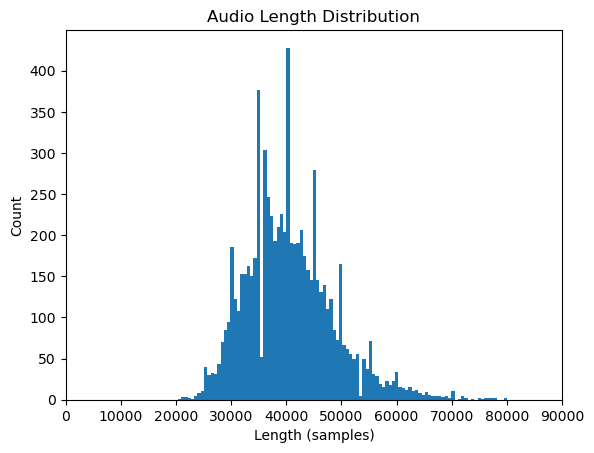

In [13]:
import matplotlib.pyplot as plt

plt.hist(lengths, bins=100)
plt.title('Audio Length Distribution')
plt.xlabel('Length (samples)')
plt.ylabel('Count')
plt.xlim(0, 90000)
plt.show()

In [15]:
import statistics
median = statistics.median(lengths)
print(f'Median length: {median}')

Median length: 40040.0


In [19]:
import torch

def pad_truncate_audio(waveForm, target_length=40040):
    if waveForm.shape[1] > target_length:
        return waveForm[:, :target_length]
    else:
        padding = target_length - waveForm.shape[1]
        pad_left = padding // 2
        pad_right = padding - pad_left
        return torch.nn.functional.pad(waveForm, (pad_left, pad_right), mode='constant', value=0)


waveForms = []

for item in tqdm(os.listdir(path)):
    waveForm, sr = torchaudio.load(os.path.join(path, item))
    waveForm = pad_truncate_audio(waveForm)
    waveForms.append(waveForm)
    
stacked_waveForms = torch.stack(waveForms)

torch.save(stacked_waveForms, "waveForms.pt")


100%|██████████| 7442/7442 [00:05<00:00, 1464.67it/s]
